In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#the used car data to do analysis.
#this data includes various cars listed in various cities like
#Hydrabad,Mumbai,Delhi,Banglore and other metropolitan cities.

In [28]:
df=pd.read_csv("cars24fullclean.csv")
df

,Unnamed: 0,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,zero_downpayment,city,state
0,0,Ford Ecosport,Ford,1.5 TITANIUMTDCI OPT,2013,Manual,179045,1,Diesel,507599,11291,Zero downpayment,Hyderabad,Telangana
1,1,Maruti Swift,Maruti,ZDI,2012,Manual,78819,2,Diesel,476699,10604,Zero downpayment,Hyderabad,Telangana
2,2,Honda Mobilio,Honda,1.5 V OPT I DTEC,2014,Manual,97289,2,Diesel,494799,11007,Zero downpayment,Hyderabad,Telangana
3,3,Maruti Wagon R 1.0,Maruti,VXI,2013,Manual,45693,2,Petrol,331999,7385,Zero downpayment,Hyderabad,Telangana
4,4,Hyundai i20 Active,Hyundai,1.2 S,2016,Manual,40586,1,Petrol,620299,13798,Zero downpayment,Hyderabad,Telangana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485,4485,Maruti Swift,Maruti,VDI,2013,Manual,35212,1,Diesel,32799,627,Zero downpayment,Pune,Maharashtra
4486,4486,Maruti Eeco,Maruti,5 STR WITH AC PLUSHTR,2018,Manual,23573,1,Petrol,27399,507,Zero downpayment,Pune,Maharashtra
4487,4487,Maruti Alto 800,Maruti,LXI,2018,Manual,33004,1,Petrol,9699,889,Zero downpayment,Pune,Maharashtra
4488,4488,Maruti Alto K10,Maruti,LXI CNG (O),2019,Manual,57875,1,Petrol,31299,594,Zero downpayment,Pune,Maharashtra


In [ ]:
#considered features are:
#1.cars name   2.cars brand   3.cars model   4.model year
#5.type(M/A)   6.kms          7.owner series 8.gasoline type
#9.price      10.Emi/month   11.city        12.state

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        4490 non-null   int64 
 1   cars_name         4490 non-null   object
 2   cars_brand        4490 non-null   object
 3   model             4490 non-null   object
 4   model_year        4490 non-null   int64 
 5   car_type          4490 non-null   object
 6   kms               4490 non-null   int64 
 7   owner             4490 non-null   int64 
 8   gasoliene_type    4490 non-null   object
 9   price             4490 non-null   int64 
 10  emi_per_month     4490 non-null   int64 
 11  zero_downpayment  4490 non-null   object
 12  city              4490 non-null   object
 13  state             4490 non-null   object
dtypes: int64(6), object(8)
memory usage: 491.2+ KB


In [ ]:
#there is no null value in data
#total int64 dtype=(6)
#total object dtype=(8)

In [21]:
df.describe()

,Unnamed: 0,model_year,kms,owner,price,emi_per_month
count,4490.000000,4490.000000,4490.000000,4490.000000,4.490000e+03,4490.000000
mean,2244.500000,2016.516481,45227.062361,1.228285,3.269645e+05,6972.457238
std,1296.295684,2.281839,33100.553227,0.482024,3.498120e+05,8011.797982
min,0.000000,1997.000000,58.000000,1.000000,0.000000e+00,0.000000
25%,1122.250000,2015.000000,21563.250000,1.000000,4.879900e+04,505.250000
50%,2244.500000,2017.000000,38188.000000,1.000000,2.226490e+05,4952.500000
75%,3366.750000,2018.000000,60620.250000,1.000000,5.326740e+05,11849.000000
max,4489.000000,2021.000000,280921.000000,8.000000,2.377599e+06,52888.000000


In [ ]:
#positively skewed= kms, owner, price, emi_per_month
#(there are chances of out liers in above data)
#negatively skewed= model_year

In [40]:
df["state"].unique() # All states in data

array(['Telangana', 'Gujarat', 'Karnataka', 'Tamilnadu', 'Haryana',
       'Rajasthan', 'West Bengal', 'Maharashtra'], dtype=object)

In [41]:
df["city"].unique() # All cities in data

array(['Hyderabad', 'Ahmedabad', 'Bengaluru', 'Chennai', 'Coimbatore',
       'Gurgaon', 'Jaipur', 'Kolkata', 'Mumbai', 'Pune'], dtype=object)

In [44]:
df["cars_brand"].unique() # All the car brands in data

array(['Ford', 'Maruti', 'Honda', 'Hyundai', 'Skoda', 'Mahindra',
       'Renault', 'Volkswagen', 'Toyota', 'Datsun', 'Mercedes', 'Tata',
       'MG', 'Audi', 'Jeep', 'KIA', 'Nissan', 'Fiat', 'ISUZU', 'BMW',
       'HYUNDAI', 'RENAULT', 'Chevrolet', 'Landrover', 'Jaguar'],
      dtype=object)

In [45]:
df["gasoliene_type"].unique() # fuel types

array(['Diesel', 'Petrol'], dtype=object)

In [58]:
df["owner"].unique()  # number of owners of a car in data

array([1, 2, 3, 4, 8], dtype=int64)

In [46]:
df["state"].value_counts() # state wise distributed cars

Maharashtra    1305
Haryana         831
Tamilnadu       715
Karnataka       450
Gujarat         404
Rajasthan       341
West Bengal     307
Telangana       137
Name: state, dtype: int64

In [ ]:
# from above data we come to know that maharashtra have heighest number of cars 
#where as telangana has lesser number of cars(statewise)

In [48]:
df["city"].value_counts() # city wise distributed cars

Gurgaon       831
Chennai       702
Mumbai        670
Pune          635
Bengaluru     450
Ahmedabad     404
Jaipur        341
Kolkata       307
Hyderabad     137
Coimbatore     13
Name: city, dtype: int64

In [ ]:
# from above data we get that gurgaon have heighest number of cars
#where as coimbatore have low car count(city wise)

In [49]:
df["cars_brand"].value_counts()
#brand wise distributed cars

Maruti        2208
Hyundai       1046
Honda          291
Ford           261
Renault        148
Toyota         106
Tata            94
Volkswagen      88
Mahindra        67
MG              29
Jeep            28
Datsun          22
Skoda           22
KIA             20
Audi            14
BMW             14
Mercedes        13
Nissan          11
Fiat             2
ISUZU            1
HYUNDAI          1
RENAULT          1
Chevrolet        1
Landrover        1
Jaguar           1
Name: cars_brand, dtype: int64

In [ ]:
#from above data we can assume "maruti" is highly preferable brand in India than others.

In [51]:
df["gasoliene_type"].value_counts()

Petrol    3289
Diesel    1201
Name: gasoliene_type, dtype: int64

In [ ]:
#from above data we understand that petrol cars are more in numbers than diesel

In [59]:
df["owner"].value_counts()

1    3569
2     829
3      84
4       7
8       1
Name: owner, dtype: int64

In [ ]:
#there is only one vehicle having number of owners=8
#large amount of cars having single owner

In [66]:
df[df["owner"]==8] # all the detail of the vehicle having 8 no of owners

,Unnamed: 0,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,zero_downpayment,city,state
1705,1705,Maruti Zen,Maruti,LX,1997,Manual,57258,8,Petrol,0,9,Zero downpayment,Coimbatore,Tamilnadu


In [67]:
df.drop(["zero_downpayment"],axis=1,inplace=True)
df # "zero_downpayment deleted"

,Unnamed: 0,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,city,state
0,0,Ford Ecosport,Ford,1.5 TITANIUMTDCI OPT,2013,Manual,179045,1,Diesel,507599,11291,Hyderabad,Telangana
1,1,Maruti Swift,Maruti,ZDI,2012,Manual,78819,2,Diesel,476699,10604,Hyderabad,Telangana
2,2,Honda Mobilio,Honda,1.5 V OPT I DTEC,2014,Manual,97289,2,Diesel,494799,11007,Hyderabad,Telangana
3,3,Maruti Wagon R 1.0,Maruti,VXI,2013,Manual,45693,2,Petrol,331999,7385,Hyderabad,Telangana
4,4,Hyundai i20 Active,Hyundai,1.2 S,2016,Manual,40586,1,Petrol,620299,13798,Hyderabad,Telangana
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485,4485,Maruti Swift,Maruti,VDI,2013,Manual,35212,1,Diesel,32799,627,Pune,Maharashtra
4486,4486,Maruti Eeco,Maruti,5 STR WITH AC PLUSHTR,2018,Manual,23573,1,Petrol,27399,507,Pune,Maharashtra
4487,4487,Maruti Alto 800,Maruti,LXI,2018,Manual,33004,1,Petrol,9699,889,Pune,Maharashtra
4488,4488,Maruti Alto K10,Maruti,LXI CNG (O),2019,Manual,57875,1,Petrol,31299,594,Pune,Maharashtra


In [77]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [74]:
df.drop([1,2,3,4],axis=0,inplace=True) #deleting some rows from the record
df

,Unnamed: 0,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,city,state
5,5,Maruti Alto K10,Maruti,VXI,2015,Manual,234695,1,Petrol,273299,6079,Hyderabad,Telangana
6,6,Skoda Octavia,Skoda,Style 1.4 TSI MT,2017,Manual,47264,1,Petrol,1292899,28760,Hyderabad,Telangana
7,7,Maruti Vitara Brezza,Maruti,VDI,2016,Manual,153631,1,Diesel,678999,15104,Hyderabad,Telangana
8,8,Honda City,Honda,V AT,2010,Automatic,152381,1,Petrol,449699,10003,Hyderabad,Telangana
9,9,Hyundai Verna,Hyundai,1.6 CRDI SX + AT,2018,Automatic,33367,1,Diesel,1069899,23799,Hyderabad,Telangana
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485,4485,Maruti Swift,Maruti,VDI,2013,Manual,35212,1,Diesel,32799,627,Pune,Maharashtra
4486,4486,Maruti Eeco,Maruti,5 STR WITH AC PLUSHTR,2018,Manual,23573,1,Petrol,27399,507,Pune,Maharashtra
4487,4487,Maruti Alto 800,Maruti,LXI,2018,Manual,33004,1,Petrol,9699,889,Pune,Maharashtra
4488,4488,Maruti Alto K10,Maruti,LXI CNG (O),2019,Manual,57875,1,Petrol,31299,594,Pune,Maharashtra


In [78]:
df.reset_index(drop=True,inplace=True) # reseting index after deleting some rows
df

,cars_name,cars_brand,model,model_year,car_type,kms,owner,gasoliene_type,price,emi_per_month,city,state
0,Maruti Alto K10,Maruti,VXI,2015,Manual,234695,1,Petrol,273299,6079,Hyderabad,Telangana
1,Skoda Octavia,Skoda,Style 1.4 TSI MT,2017,Manual,47264,1,Petrol,1292899,28760,Hyderabad,Telangana
2,Maruti Vitara Brezza,Maruti,VDI,2016,Manual,153631,1,Diesel,678999,15104,Hyderabad,Telangana
3,Honda City,Honda,V AT,2010,Automatic,152381,1,Petrol,449699,10003,Hyderabad,Telangana
4,Hyundai Verna,Hyundai,1.6 CRDI SX + AT,2018,Automatic,33367,1,Diesel,1069899,23799,Hyderabad,Telangana
...,...,...,...,...,...,...,...,...,...,...,...,...
4480,Maruti Swift,Maruti,VDI,2013,Manual,35212,1,Diesel,32799,627,Pune,Maharashtra
4481,Maruti Eeco,Maruti,5 STR WITH AC PLUSHTR,2018,Manual,23573,1,Petrol,27399,507,Pune,Maharashtra
4482,Maruti Alto 800,Maruti,LXI,2018,Manual,33004,1,Petrol,9699,889,Pune,Maharashtra
4483,Maruti Alto K10,Maruti,LXI CNG (O),2019,Manual,57875,1,Petrol,31299,594,Pune,Maharashtra


<AxesSubplot:>

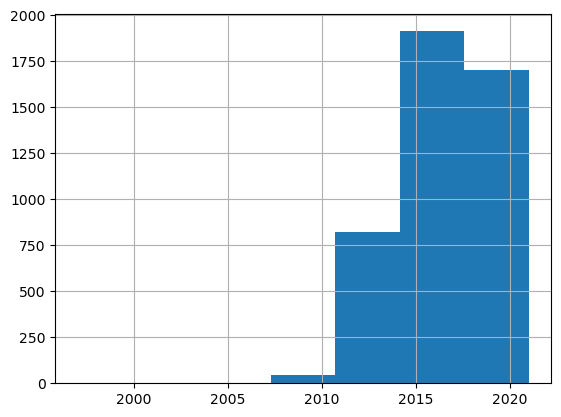

In [90]:
df["model_year"].hist(bins=7)

In [ ]:
# from above chart we can assume that, there is more number of cars from year approx "2014 to 2018" for sale

Text(0.5, 1.0, 'Different car brands with there count')

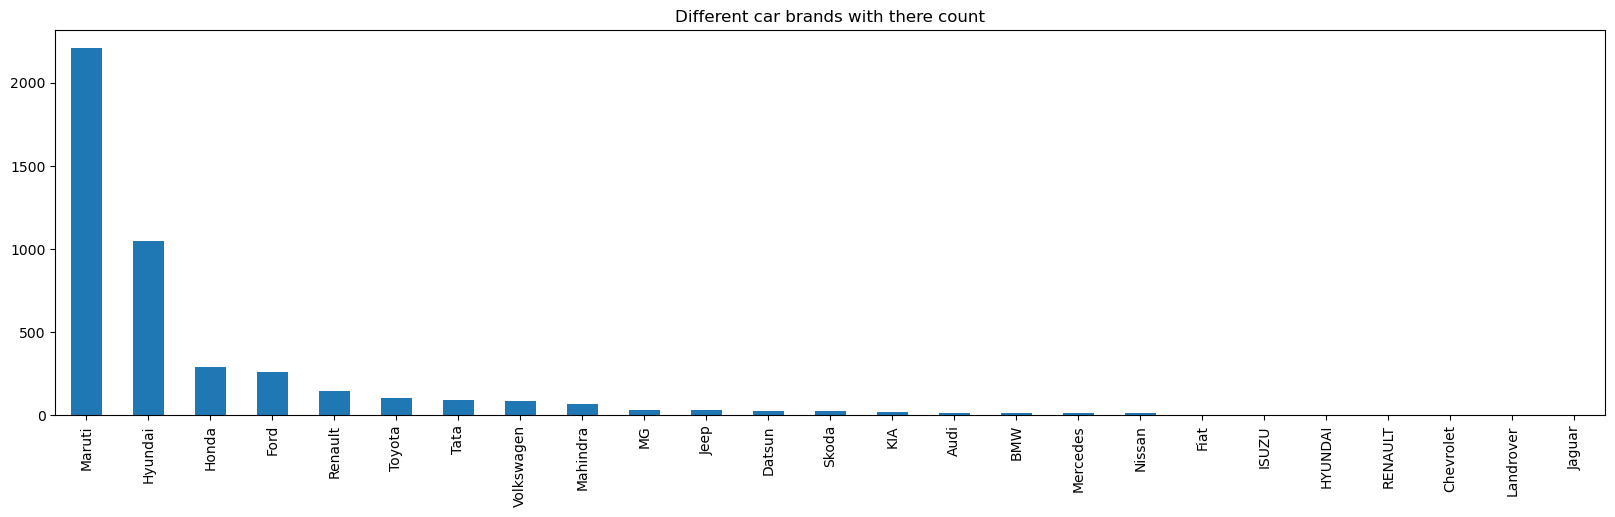

In [98]:
plt.figure(figsize=(20,5))
df.cars_brand.value_counts().plot.bar()
plt.title('Different car brands with there count')

In [ ]:
#In data frame there are 24 unique brands of cars
#The most listed car brand in cars24 is Maruti with more than 2000 cars
#The low listed car brands in cars24 are shown in above plot which are less than 30


Text(0.5, 1.0, 'Citywise listed count for Maruti Brand')

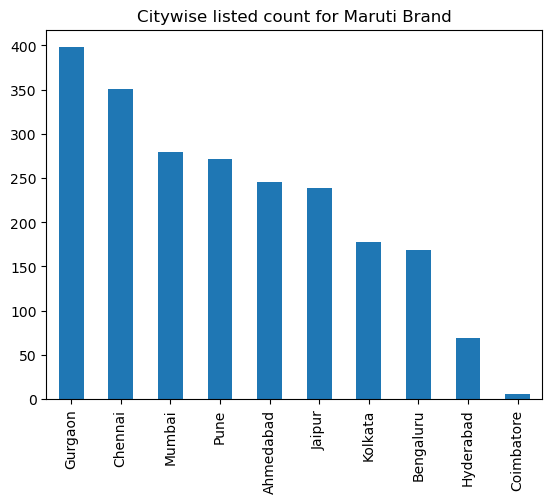

In [99]:
df[df['cars_brand'] == 'Maruti']['city'].value_counts().plot.bar()
plt.title('Citywise listed count for Maruti Brand') # 

In [ ]:
#from above data we get that the more number of Maruti cars are listed in Gurgaon city

Text(0.5, 1.0, 'only in Maharashtra')

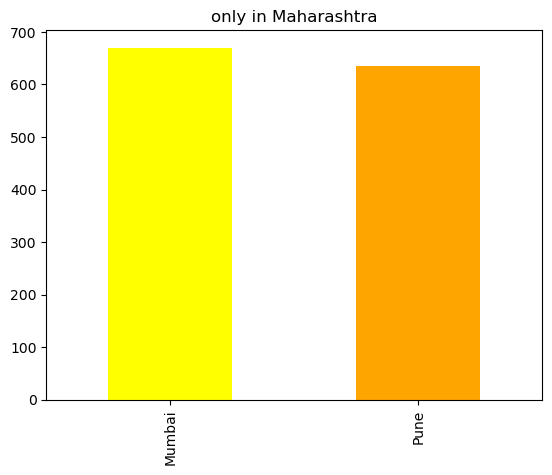

In [103]:
df[df['state'] == 'Maharashtra']['city'].value_counts().plot.bar(color = ['yellow','orange'])
plt.title('only in Maharashtra')

In [ ]:
#in maharashtra there are two cities where cars24 deals in cars in which Mumbai has more cars than Pune

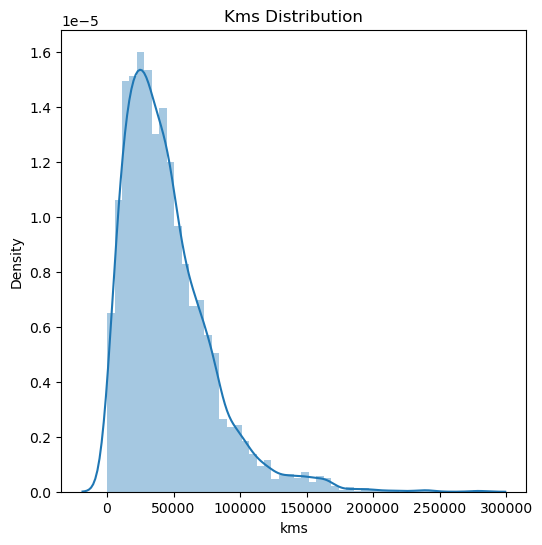

In [106]:
plt.figure(figsize=(6,6))
sns.distplot(df['kms'])
plt.title('Kms Distribution')
plt.show()

In [ ]:
# from observation we can assume that cars24 has most cars driven around 0-100000kms

Text(0.5, 1.0, 'Price Distribution')

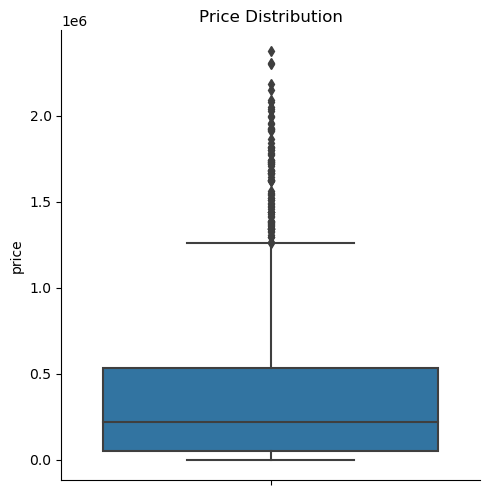

In [107]:
sns.catplot(y = 'price',data = df,kind = 'box')
plt.title('Price Distribution')

In [ ]:
#from above picture we get that most car listed on cars 24 are between 1 lac to 5 lacs.
#also we can guess the outlier

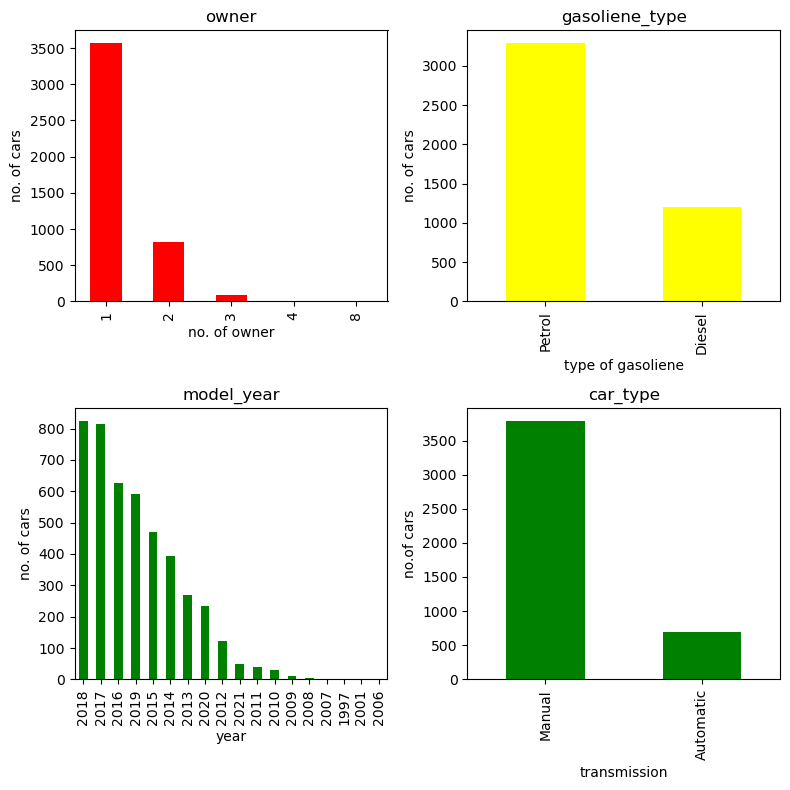

In [116]:
plt.figure(1)
plt.subplot(2,2,1)
df["owner"].value_counts().plot(figsize=(6,6),kind="bar",color="red")
plt.title("owner")
plt.xlabel("no. of owner")
plt.ylabel("no. of cars")


plt.subplot(2,2,2)
df["gasoliene_type"].value_counts().plot(figsize=(6,6),kind="bar",color="yellow")
plt.title("gasoliene_type")
plt.xlabel("type of gasoliene")
plt.ylabel("no. of cars")

plt.subplot(2,2,3)
df["model_year"].value_counts().plot(figsize=(8,8),kind="bar",color="green")
plt.title("model_year")
plt.xlabel("year")
plt.ylabel("no. of cars")

plt.subplot(2,2,4)
df["car_type"].value_counts().plot(figsize=(8,8),kind="bar",color="green")
plt.title("car_type")
plt.xlabel("transmission")
plt.ylabel("no.of cars")


plt.tight_layout()
plt.show()

In [ ]:
# from above charts we can observe that
#1. 1st owner vehicles are more listed
#2. more petrol vehicles available than diesel
#3. year wise distribution of cars
#4. manual cars are more in numbers than automatic


<AxesSubplot:>

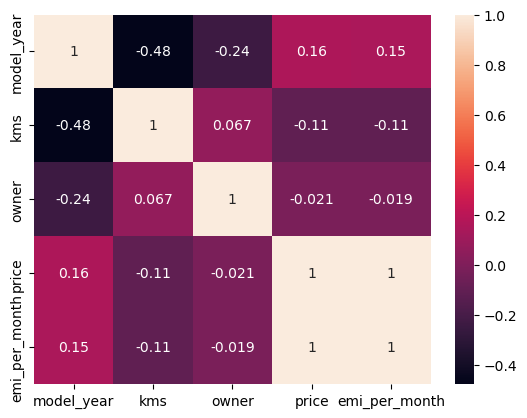

In [124]:
df_corr = df.corr()
sns.heatmap(df_corr,annot=True)

In [ ]:
#The most of data is poor negative and poor positive correlation
#There is 1 for price and emi_per_month

Text(0.5, 1.0, 'best varient to buy of maruti')

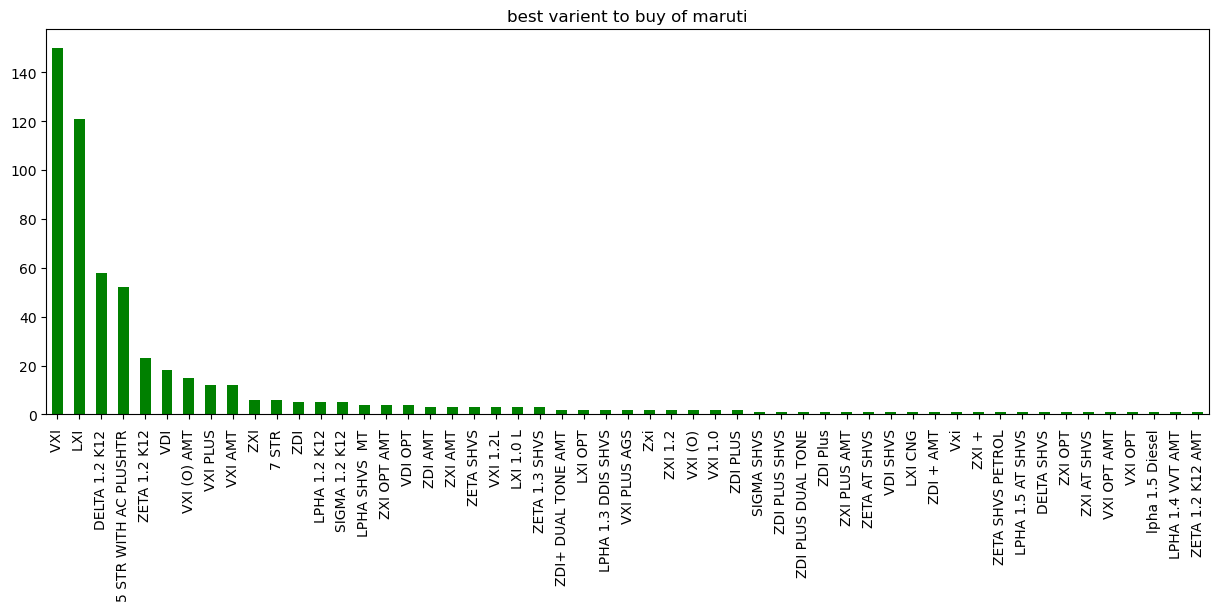

In [127]:
plt.figure(figsize=(15,5))
df[(df['price'] <= 500000) & (df['model_year'] >= 2018) & (df['kms'] <= 50000) & (df['cars_brand'] == 'Maruti')]['model'].value_counts().plot.bar(color = 'green')
plt.title('best varient to buy of maruti')

In [ ]:
# VXI is best varient of maruti to buy with reasonable pricing and condtion
#with the help of above formula we can find suitable car with other models with our own condtitions